# **Building a Neural Network using pytorch**

However, for all of these, we built them from scratch using NumPy arrays in Python. In this section, we will learn about implementing all of these using PyTorch on a toy dataset. Note that we will leverage our learning so far regarding initializing tensor objects, performing various operations on top of them, and calculating the gradient values to update weights when building a neural network using PyTorch.

Note that, in this chapter, to gain the intuition of performing various operations, we will build a neural network on a toy dataset. Starting with the next chapter, we will deal with solving more realistic problems and datasets.

The toy problem we'll solve to understand the implementation of neural networks using PyTorch is a plain addition of two numbers, where we initialize the dataset as follows:

# **Define the input (x) and output (y) values:**

In [ ]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

### the input and output are a list of lists where the sum of values in the input list is the values in the output list.

# Convert the input list in to Tensor object..

In [ ]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

Note that in the preceding code, we have converted the tensor objects into floating-point objects. It is good practice to have tensor objects as floats or long ints, as they will be multiplied by decimal values (weights) anyway.

# Furthermore, we register the input (X) and output (Y) data points to the device – cuda if you have a GPU and cpu 

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'gpu'

In [ ]:
X = X.to(device)
Y = Y.to(device)

# Define the neural network Architecture..

The torch.nn module contains functions that help in building neural network models:

In [ ]:
import torch.nn as nn

# We will create a class (MyNeuralNet) that can compose our neural network architecture. It is mandatory to inherit from nn.Module when creating a model architecture as it is the base class for all neural network modules:

In [ ]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)
        #Now that we have defined the components of a neural network, let's connect the components together while defining the forward propagation of the network:
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

# You can access the initial weights of each of the components by performing the following steps



Create an instance of the MyNeuralNet class object that we defined earlier and register it to device:

In [ ]:
mynet = MyNeuralNet().to(device)

# The weights and bias of each layer can be accessed by specifying the following:

In [ ]:
# NOTE - This line of code is not a part of model building, 
# this is used only for illustration of 
# how to obtain parameters of a given layer
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.6410,  0.2607],
        [ 0.6687, -0.3547],
        [-0.5858,  0.2037],
        [ 0.0775,  0.6394],
        [ 0.4973, -0.5715],
        [-0.4712, -0.6182],
        [ 0.3971, -0.6732],
        [-0.6622,  0.1049]], device='cuda:0', requires_grad=True)

The values in your output will vary from the preceding, as the neural network is initialized with random values every time. If you wanted them to remain the same in multiple iterations of executing the same code, you would need to specify the seed using the manual_seed method in Torch as torch.manual_seed(0) just before creating the instance of the class object

# All the parameters of a neural network can be obtained by using the following code:

In [ ]:
# NOTE - This line of code is not a part of model building, 
# this is used only for illustration of 
# how to obtain parameters of a given layer
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.6410,  0.2607],
        [ 0.6687, -0.3547],
        [-0.5858,  0.2037],
        [ 0.0775,  0.6394],
        [ 0.4973, -0.5715],
        [-0.4712, -0.6182],
        [ 0.3971, -0.6732],
        [-0.6622,  0.1049]], device='cuda:0', requires_grad=True)

# The preceding code returns a generator object.

# Finally, the parameters are obtained by looping through the generator, as follows:

In [ ]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[-0.6410,  0.2607],
        [ 0.6687, -0.3547],
        [-0.5858,  0.2037],
        [ 0.0775,  0.6394],
        [ 0.4973, -0.5715],
        [-0.4712, -0.6182],
        [ 0.3971, -0.6732],
        [-0.6622,  0.1049]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0161, -0.5582, -0.7023,  0.5704, -0.2971,  0.6022,  0.2933, -0.0413],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.0750, -0.2112, -0.1910, -0.1483,  0.1690, -0.1606, -0.2302, -0.3207]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.2634], device='cuda:0', requires_grad=True)


The model has registered these tensors as special objects that are necessary for keeping track of forward and backward propagation. When defining any nn layers in the __init__ method, it will automatically create corresponding tensors and simultaneously register them. You can also manually register these parameters using the nn.Parameter(<tensor>) function. Hence, the following code is equivalent to the neural network class that we defined previously.

# An alternative way of defining the model using the nn.Parameter function is as follows:

In [ ]:
# for illustration only
class MyNeuralNet(nn.Module):
     def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Parameter(\
                                          torch.rand(2,8))
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Parameter(\
                                          torch.rand(8,1))

     def forward(self, x):
        x = x @ self.input_to_hidden_layer
        x = self.hidden_layer_activation(x)
        x = x @ self.hidden_to_output_layer
        return x

# Define the loss function that we optimize for. Given that we are predicting for a continuous output, we'll optimize for mean squared error:

In [ ]:
loss_func = nn.MSELoss()

In [ ]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)
# tensor(91.5550, grad_fn=<MseLossBackward>)
# Note that loss value can differ in your instance 
# due to a different random weight initialization

tensor(122.6391, device='cuda:0', grad_fn=<MseLossBackward>)


In the preceding code, mynet(X) calculates the output values when the input is passed through the neural network. Furthermore, the loss_func function calculates the MSELoss value corresponding to the prediction of the neural network (_Y) and the actual values (Y).

Now that we have defined the loss function, we will define the optimizer that tries to reduce the loss value. The input to the optimizer will be the parameters (weights and biases) corresponding to the neural network and the learning rate when updating the weights.


*   For this instance, we will consider the stochastic gradient descent (more on different optimizers and the impact of the learning rate in the next chapter).



# **Import the SGD method from the torch.optim module and then pass the neural network object (mynet) and learning rate (lr) as parameters to the SGD method:**

In [16]:
from torch.optim import SGD
opt = SGD(mynet.parameters(),lr =0.001)

Perform all the steps to be done in an epoch together:


*   Calculate the loss value corresponding to the given input and output.
*   Calculate the gradient corresponding to each parameter.


1.   Update the weights based on the learning rate and gradient of each parameter.
2.   Once the weights are updated, ensure that the gradients that have been calculated in the previous step are flushed before calculating the gradients in the next epoch:





In [18]:
# NOTE - This line of code is not a part of model building, 
# this is used only for illustration of how we perform 
opt.zero_grad()  # flush the previous epoch's gradients
loss_value = loss_func(mynet(X),Y) # compute loss
loss_value.backward() # perform back-propagation
opt.step # update the weights according to the gradients computed

<bound method SGD.step of SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)>

Repeat the preceding steps as many times as the number of epochs using a for loop. In the following example, we are performing the weight update process for a total of 50 epochs. Furthermore, we are storing the loss value in each epoch in the list – loss_history:

In [19]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X),Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value)

# Let's plot the variation in loss over increasing epochs (as we saw in the previous chapter, we update weights in such a way that the overall loss value decreases with increasing epochs):

Text(0, 0.5, 'loss value')

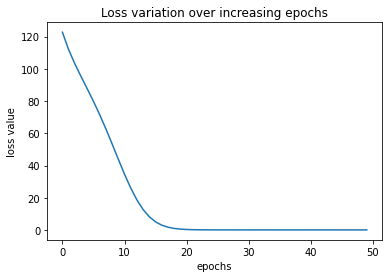

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

Note that, as expected, the loss value decreases over increasing epochs.

So far, in this section, we have updated the weights of a neural network by calculating the loss based on all the data points provided in the input dataset.